In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dcars = cv2.CascadeClassifier("c:/Users/hp/Desktop/TEST FOLDER/cars.xml")
d2whl = cv2.CascadeClassifier("c:/Users/hp/Desktop/TEST FOLDER/2wheel.xml")

In [7]:
cap = cv2.VideoCapture('f:/rene_video.mov')
count = 0
lincord = []

def mouse(event,x,y,flags,params):
    global count
    if event == cv2.EVENT_LBUTTONDOWN:
        if count<2:
            lincord.append([x,y])
            count = count + 1
        
cv2.namedWindow('detect')
cv2.setMouseCallback('detect',mouse)
while True:
    _,frame = cap.read()
    if _==False:
        break
        
    cv2.imshow("detect",frame)
    k = cv2.waitKey(33)
    if k == 27:
        break 
        
cap.release()
cv2.destroyAllWindows()
print lincord

[[608, 384], [713, 390]]


In [7]:
cv2.destroyAllWindows()

In [5]:
import os
if not os.path.exists("c:/Users/hp/Desktop/lanejumper/"):
    os.makedirs("c:/Users/hp/Desktop/lanejumper/")

In [8]:
cap = cv2.VideoCapture('f:/rene_video.mov')
count = 0

reference = [(lincord[0][1]+lincord[1][1])/2.0,(lincord[0][0]+lincord[1][0])/2.0]

while True:
    global centre,nframes
    _,frame = cap.read()
    if _==False:
        break
    frame_copy = frame.copy()
    cv2.line(frame_copy,tuple(lincord[0]),tuple(lincord[1]),(100,255,100),2)
    f = frame[lincord[0][1]-60:lincord[1][1],lincord[0][0]:lincord[1][0]]
    
    car = dcars.detectMultiScale(f,1.03)    
    
    reference = [f.shape[0], f.shape[1]]
    
    for (a,b,c,d) in car:
        cv2.rectangle(f,(a,b),(a+c,b+d),(225,0,0),1)
        roi = f[b:b+d,a:a+c]
        centre = (a+c/2,b+d/2)
        if reference[0]-centre[0] < 0 :
            cv2.imwrite("c:/Users/hp/Desktop/lanejumper/"+str(count)+'.jpeg',roi)
            count +=1
            
            
    cv2.imshow("detect",frame_copy)

    cv2.imshow('f',f)

    
    k = cv2.waitKey(24)
    if k ==27:
        break 
        
cap.release()
cv2.destroyAllWindows()

In [56]:
cv2.destroyAllWindows()

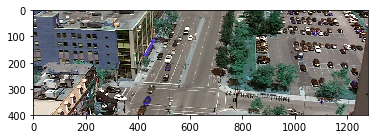

In [151]:
plt.imshow(frame[200:600])

In [1]:
import pytesseract as tess

In [3]:
x = cv2.imread("c:/Users/hp/Downloads/Compressed/Indian-Number-Plate-Recognition-System-master/testData/test.jpeg")

In [123]:
gray = cv2.cvtColor(x,cv2.COLOR_RGB2GRAY)
l,b =gray.shape[:2]
roi = gray[int(l*0.6):int(l*0.8),int(b*0.25):int(b*0.75)]

ret1,th1 = cv2.threshold(roi,127,255,cv2.THRESH_BINARY)
ret2,th2 = cv2.threshold(roi,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

blur = cv2.GaussianBlur(roi,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

roi = cv2.Sobel(th2,cv2.CV_8U,1,0,ksize=1)

roi = cv2.adaptiveThreshold(roi,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,125,1)
#roi = cv2.threshold(roi,0,225,cv2.THRESH_BINARY)

In [124]:
cv2.imshow('x',roi)
cv2.imshow('gray',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [125]:
text = tess.image_to_string(th2,lang='eng')

In [126]:
text

u'uEEEECEEe\n\nHHO TAVea66'